In [218]:
import sympy as sp
from IPython.display import display
from matplotlib.ticker import EngFormatter

In [219]:
engf = EngFormatter()

class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto

In [220]:
def cramers_rule(A,b):
    display(A)
    det_A = A.det()
    print(f"detA= {engf(det_A)}\n")

    if det_A == 0:
        raise ValueError("The $\det(A)$ is zero; the system has no unique solution.")
    
    solutions = []

    for i in range(A.cols):
        print(f'I={i}') #Be verbose about which iteration we are on
        
        A_i = A.copy() #
        A_i[:, i] = b
        display(A_i)
        
        det_Ai = A_i.det()
        print(f"det{i}= {engf(det_Ai)}")
        
        sol = det_Ai/det_A
        solutions.append(sol.evalf())
        print(f"sol{i}= {engf(sol)}\n")

    return solutions

In [221]:
va, vb, vc = sp.symbols('V_a,V_b,V_c')

## 28

In [222]:
na = (40-va)/68 - (va-30)/82 - va/147
na

665/697 - 13813*V_a/409836

In [223]:
eq1= sp.Eq(na,0)
sp.solve(eq1, va)[0].evalf()

28.3081155433287

In [224]:
na = (1/82+1/68+1/147)*va - 30/82 - 40/68
na

0.0337037253925961*V_a - 0.954088952654232

In [225]:
eq1= sp.Eq(na,0)
sp.solve(eq1, va)[0].evalf()

28.3081155433287

## 30

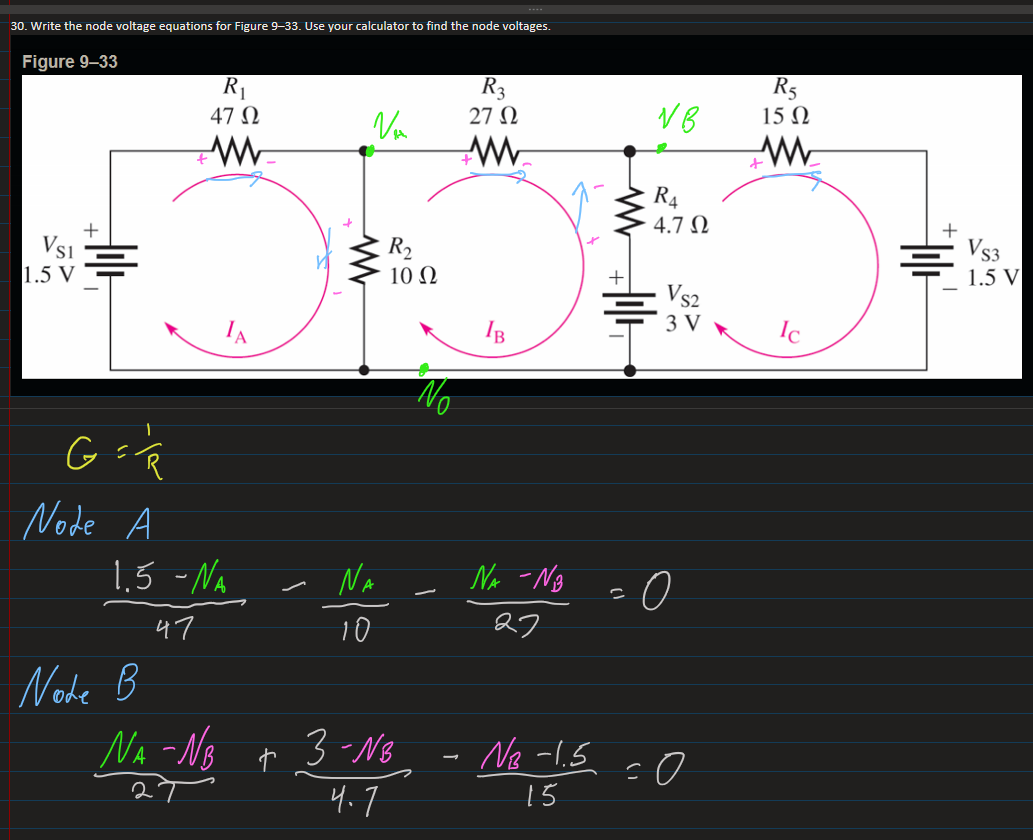

In [226]:
na = (1.5-va)/47 - va/10 - (va-vb)/27
eq1= sp.Eq(na,0)
eq1

Eq(-2009*V_a/12690 + V_b/27 + 0.0319148936170213, 0)

In [227]:
nb = (va-vb)/27 + (3-vb)/4.7 - (vb-1.5)/15
eq2= sp.Eq(nb,0)
eq2

Eq(V_a/27 - 0.316469661150512*V_b + 0.738297872340426, 0)

In [228]:
# We can programmatically pull the coefficients of each variable into a matrix
A= sp.Matrix([
    [na.coeff(va), na.coeff(vb)],
    [nb.coeff(va), nb.coeff(vb)]
])
A

Matrix([
[-2009/12690,               1/27],
[       1/27, -0.316469661150512]])

In [229]:
# And by zeroing out each variable we are left with the constants.
b = sp.Matrix(
    [
        na.subs({va:0,vb:0,vc:0}),
        nb.subs({va:0,vb:0,vc:0})
    ]
)
b

Matrix([
[0.0319148936170213],
[ 0.738297872340426]])

In [230]:
sol = cramers_rule(A,b)
sol

Matrix([
[-2009/12690,               1/27],
[       1/27, -0.316469661150512]])

detA= 48.7297196094540 m

I=0


Matrix([
[0.0319148936170213,               1/27],
[ 0.738297872340426, -0.316469661150512]])

det0= −37.4444612108713 m
sol0= −768.411177223494 m

I=1


Matrix([
[-2009/12690, 0.0319148936170213],
[       1/27,  0.738297872340426]])

det1= −118.064651342152 m
sol1= −2.42284692562128



[-0.768411177223494, -2.42284692562128]

In [231]:
engf((1.5+sol[0])/47)

'15.5657196335427 m'

In [232]:
engf(sol[0]/10)

'−76.8411177223494 m'

## 31

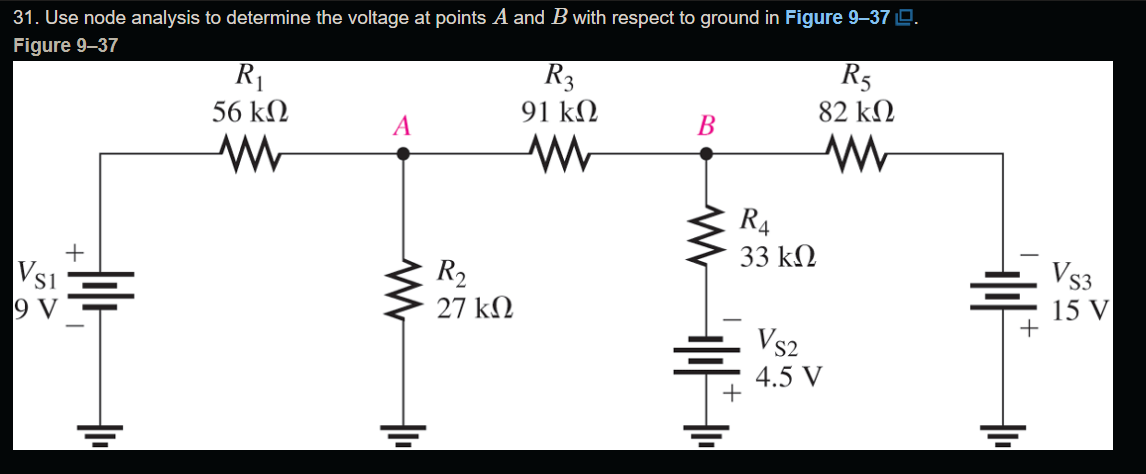

In [233]:
na =  (va-9)/56 + va/27 + (va-vb)/91
na

185*V_a/2808 - V_b/91 - 9/56

In [234]:
nb = (vb-va)/91 + (vb+4.5)/33 + (vb+15)/82
nb

-V_a/91 + 13171*V_b/246246 + 0.319290465631929

In [235]:
A= sp.Matrix([
    [na.coeff(va), na.coeff(vb)],
    [nb.coeff(va), nb.coeff(vb)]
])
A

Matrix([
[185/2808,        -1/91],
[   -1/91, 13171/246246]])

In [236]:
b = sp.Matrix(
    [
        -na.subs({va:0,vb:0,vc:0}),
        -nb.subs({va:0,vb:0,vc:0})
    ]
)
b

Matrix([
[              9/56],
[-0.319290465631929]])

In [237]:
sol = cramers_rule(A,b)
sol

Matrix([
[185/2808,        -1/91],
[   -1/91, 13171/246246]])

detA= 3.40314662323954 m

I=0


Matrix([
[              9/56,        -1/91],
[-0.319290465631929, 13171/246246]])

det0= 5.08746480000835 m
sol0= 1.49492965282979

I=1


Matrix([
[185/2808,               9/56],
[   -1/91, -0.319290465631929]])

det1= −19.2697836426059 m
sol1= −5.66234305363622



[1.49492965282979, -5.66234305363622]

## 32

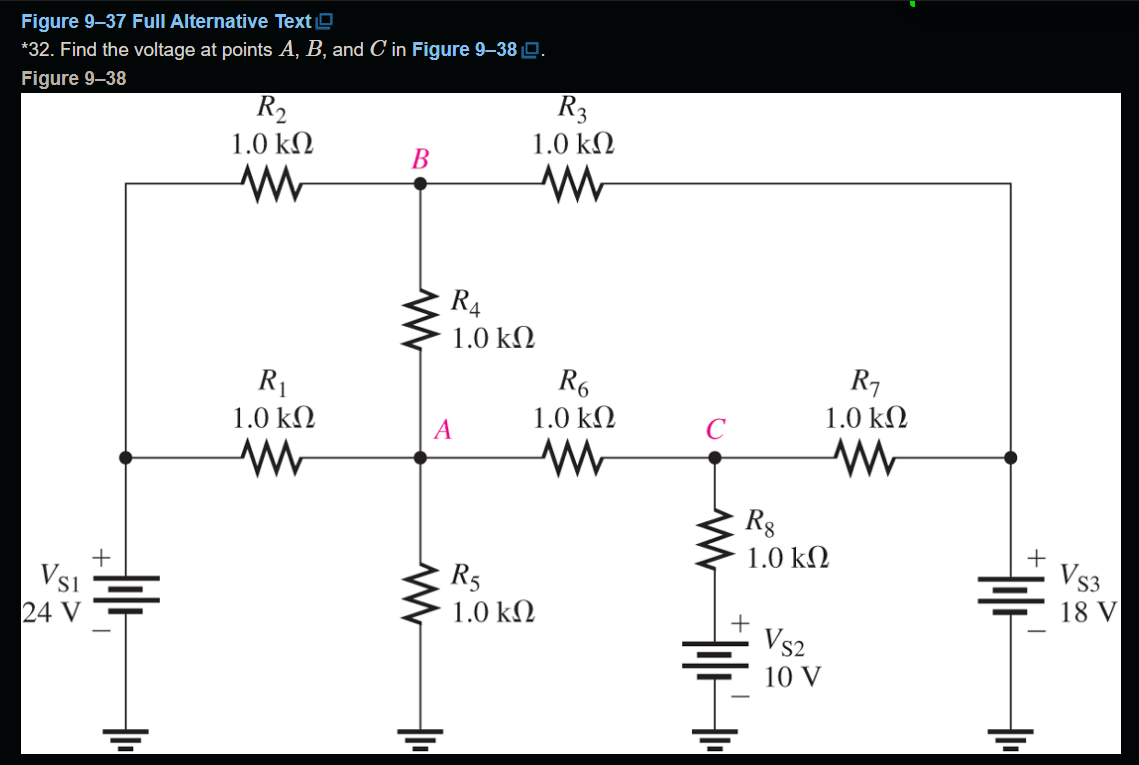

In [238]:
# All resistors are equal to 1kΩ, so we can ignore them in the equations
na = (va-24)  + (va-vc)  + (va-vb)  + va 
na

4*V_a - V_b - V_c - 24

In [239]:
nb = (vb-24)  + (vb-va)  + (vb-18) 
nb

-V_a + 3*V_b - 42

In [240]:
nc = (vc-va)  +( vc-10)  + (vc-18) 
nc

-V_a + 3*V_c - 28

In [241]:
A= sp.Matrix([
    [na.coeff(va), na.coeff(vb), na.coeff(vc)],
    [nb.coeff(va), nb.coeff(vb), nb.coeff(vc)],
    [nc.coeff(va), nc.coeff(vb), nc.coeff(vc)],
])
A

Matrix([
[ 4, -1, -1],
[-1,  3,  0],
[-1,  0,  3]])

In [242]:
b = sp.Matrix(
    [
        -na.subs({va:0,vb:0,vc:0}),
        -nb.subs({va:0,vb:0,vc:0}),
        -nc.subs({va:0,vb:0,vc:0}),
    ]
)
b

Matrix([
[24],
[42],
[28]])

In [243]:
sol = cramers_rule(A,b)
sol

Matrix([
[ 4, -1, -1],
[-1,  3,  0],
[-1,  0,  3]])

detA= 30.0000000000000

I=0


Matrix([
[24, -1, -1],
[42,  3,  0],
[28,  0,  3]])

det0= 426.000000000000
sol0= 14.2000000000000

I=1


Matrix([
[ 4, 24, -1],
[-1, 42,  0],
[-1, 28,  3]])

det1= 562.000000000000
sol1= 18.7333333333333

I=2


Matrix([
[ 4, -1, 24],
[-1,  3, 42],
[-1,  0, 28]])

det2= 422.000000000000
sol2= 14.0666666666667



[14.2000000000000, 18.7333333333333, 14.0666666666667]